In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [24]:
class ft_linear_regression:
    
    def __init__(self) -> None:
        # Load data from csv file
        self.data = pd.read_csv('data.csv')
		# Get data into np.array
        self.X = np.array(self.data['km']).reshape(-1, 1)
        self.Y = np.array(self.data['price']).reshape(-1, 1)
		# Scale predictive variable
        self.scaler = preprocessing.StandardScaler().fit(self.X)
        self.X = self.scaler.transform(self.X)
		# Add intercept feature
        self.X = np.hstack([np.ones_like(self.X), self.X])
        # Initialize parameters, hyperparameters and cost
        self.theta = np.array([[0.0], [0.0]])
        self.m = self.X.shape[0]
        self.cost = []
        
    def fit(self, lr=0.1, iter=50) -> None:
        for _ in range(iter):
            # Make predictions based on current parameters
            Y_pred = self.X.dot(self.theta)
            # Calculate cost
            self.cost.append(np.sum((self.Y - Y_pred[:, 0]) ** 2) / self.m)
        	# Update parameters
            self.theta[1] += lr * sum(self.X[:, 1] * (self.Y - Y_pred)[:, 0]) / self.m
            self.theta[0] += lr * sum(self.Y - Y_pred) / self.m
            
    def predict(self, data) -> np.array:
        # Scale new data based on training scaler
        data_scaled = self.scaler.transform(data)
        # Add intercept feature
        data_trans = np.hstack([np.ones_like(data_scaled), data_scaled])
        # Return predictions
        return data_trans.dot(self.theta)
    
    def plot_data(self) -> None:
        # Plot training data
        plt.scatter(self.data.iloc[:, 0], self.data.iloc[:, 1])
        plt.xlabel(self.data.columns[0])
        plt.ylabel(self.data.columns[1])
        
    def plot_regression(self) -> None:
        # Plot regression coefficients
        plt.scatter(self.data.iloc[:, 0], self.data.iloc[:, 1])
        # Unscaling learned coefficients
        plt.plot(self.data.iloc[:, 0], self.theta[0] - self.theta[1] * np.mean(self.data.iloc[:, 0]) / np.std(self.data.iloc[:, 0]) + self.theta[1] / np.std(self.data.iloc[:, 0]) * self.data.iloc[:, 0], '-', c='r')
        plt.xlabel(self.data.columns[0])
        plt.ylabel(self.data.columns[1])
        
    def plot_cost(self) -> None:
        # Plot cost evolution against training epochs
        plt.plot(self.cost)
        plt.xlabel('epochs')
        plt.ylabel('cost')
        
    def error(self, X, Y) -> float:
        # Calculate error on testing data
        Y_pred = self.predict(X)
        return np.sum(Y - Y_pred[:, 0]) / X.shape[0]

In [25]:
LR = ft_linear_regression()


In [26]:
LR.fit()

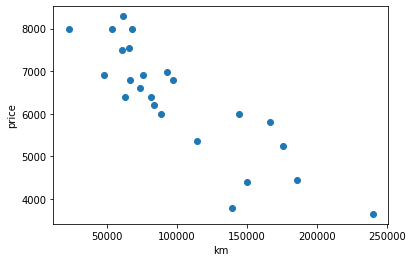

In [27]:
LR.plot_data()

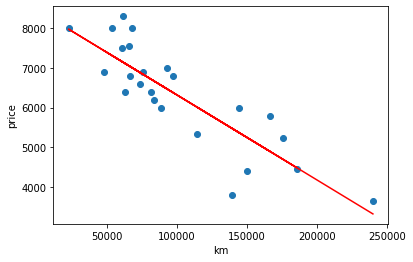

In [28]:
LR.plot_regression()

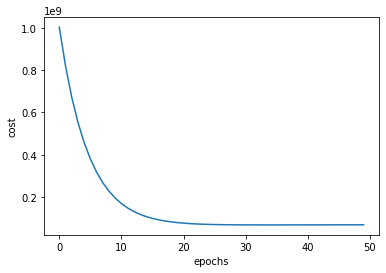

In [29]:
LR.plot_cost()

In [30]:
test = np.array([[150000, 5000], [50000, 7000], [210000, 4000]])

In [31]:
LR.predict(test[:, 0].reshape(-1, 1))

array([[5255.03155575],
       [7388.87360124],
       [3974.72632845]])

In [32]:
LR.scaler.scale_

array([51565.18991064])

In [33]:
LR.error(test[:, 0].reshape(-1, 1), test[:, 1].reshape(-1, 1))

-618.6314854382567